<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [2]:
# Переменная для хранения оригинальной копии данных
hh_orig_data = None

def hh_data_cp():
    """Создает и возвращает копию оригинальных данных как объект Pandas DataFrame.
    При первом вызове читает данные из файла "dst-3.0_16_1_hh_database.csv" 
    и сохраняет в глобальной переменной hh_orig_data.

    Returns:
        DataFrame: Копия оригинальных данных HeadHunter
    """
    global hh_orig_data

    if hh_orig_data is None:
        hh_orig_data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

    return hh_orig_data.copy()

2. Выведите несколько первых (последних строк таблицы), чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [164]:
hh = hh_data_cp()

hh.tail(5)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44739,"Мужчина , 30 лет , родился 17 января 1989",50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","Опыт работы 7 лет 7 месяцев Финансист, аналит...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,Высшее образование 2015 Московский гуманитарн...,22.04.2019 12:32,Не указано
44740,"Мужчина , 27 лет , родился 5 марта 1992",39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...","Опыт работы 7 лет Системный администратор, IT...",ИП Пестрецов,Предприниматель,Высшее образование (Бакалавр) 2016 Воронежски...,22.04.2019 13:11,Не указано
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице

In [165]:
hh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений

In [166]:
# Информация о числе непустых значений показана выше, в столбце Non-Null.
# Но считывать ее не очень удобно.

# Легче обнаружить столбцы с пропусками
hh.isna().sum()

Пол, возраст                         0
ЗП                                   0
Ищет работу на должность:            0
Город, переезд, командировки         0
Занятость                            0
График                               0
Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Образование и ВУЗ                    0
Обновление резюме                    0
Авто                                 0
dtype: int64

5. Выведите основную статистическую информацию о столбцах.


In [167]:
hh.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 2014 Московский технически...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [168]:
def get_ed_type(cell_text: str) -> str:
    """Получает содержимое ячейки `Образование и ВУЗ`.
    Выделяет уровень образования (высшее, неоконченное высшее, среднее специальное или среднее)
    и возвращает его в нижнем регистре.
    
    Пример содержимого ячейки:
    - "Неоконченное высшее образование 2000  Балтийск..."
    - "Высшее образование 1981  Военно-космическая ак..."
    - "Среднее специальное образование 2002 Профессио..."
    - "Среднее образование 2008 моу сош вч ..."

    Args:
        cell_text (str): Информация об образовании: уровень образования, год выпуска, ВУЗ, специальность

    Returns:
        str: Уровень образования в нижнем регистре
    """

    words = cell_text.split(' ')
    ed_index = words.index('образование')
    ed_words = words[:ed_index]
    ed_type = ' '.join(ed_words).lower()

    return ed_type

# создаем новую колонку с уровнем образования
hh['Образование'] = hh['Образование и ВУЗ'].apply(get_ed_type)

# убеждаемся, что новая колонка содержит четыре уникальных значения
hh['Образование'].value_counts()

высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: Образование, dtype: int64

In [169]:
# удаляем оригинальную колонку
hh.drop(columns=['Образование и ВУЗ'], inplace=True)

# приводвим новую колонку к типу `category`
hh['Образование'] = hh['Образование'].astype('category')


2. Теперь нас интересует столбец **"Пол/возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [170]:
# получаем пол просто взяв первую букву текста ячейки
hh['Пол'] = hh['Пол, возраст'].apply(lambda x: x[0])

# убеждаемся, что в колонке `Пол` только два значения
print(hh['Пол'].value_counts())

def get_age(cell_text: str) -> int:
    """Получает содержимое ячейки `Пол, возраст`
    находит информацию о возрасте и возвращает ее, преобразовав к целому числу

    Args:
        cell_text (str): Содержимое ячейки `Пол, возраст`

    Returns:
        int: Возраст соискателя
    """
    
    age_str = cell_text.split(',')[1].strip()
    age_int = int(age_str.split(' ')[0])
    
    return age_int

# получаем возвраст с помощью функции `get_age`
hh['Возраст'] = hh['Пол, возраст'].apply(get_age)

# убеждаемся, что в колонке `Возраст` содержатся только положительные числа
print(hh['Возраст'].describe())

М    36211
Ж     8533
Name: Пол, dtype: int64
count    44744.000000
mean        32.196741
std          7.929800
min         14.000000
25%         27.000000
50%         31.000000
75%         36.000000
max        100.000000
Name: Возраст, dtype: float64


---

# 👴

*Видим, что максимальный возраст — 100 лет, что похоже на аномалию. Мы разберемся с этим позже.*

---

In [171]:
# преобразуем колонку `Пол` в категорию
hh['Пол'] = hh['Пол'].astype('category')

# преобразуем колонку `Возраст` к типу `int8`
hh['Возраст'] = hh['Возраст'].astype('int8')

# удаляем оригинальную колонку
hh.drop(columns=['Пол, возраст'], inplace=True)

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-третьих, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [172]:
def get_experience(cell_text):
    """Получает содержимое ячейки `Опыт работы`
    Находит информацию об опыте работы (N лет M месяцев)
    Преобразует ее в месяцы и возвращает в виде целого числа.
    Если содержимое ячейки NaN или если оно имеет какой-то неожиданный формат,
    то функция возвращает его как np.nan
    
    Содержимое ячейки может содержать или не содержать кол-во лет и месяцев. 
    Форма слов меняется в зависимости от количества. Например:
    - "Опыт работы 8 лет 2 месяца ..."
    - "Опыт работы 11 месяцев ..."
    - "Опыт работы 1 год 1 месяц ..."
    - "Опыт работы 4 года ..."

    Args:
        cell_text (str): Содержимое ячейки `Опыт работы`

    Returns:
        int or np.nan: Опыт работы соискателя в месяцах
    """
    
    if cell_text is np.nan:
        return np.nan

    month_forms = ['месяц', 'месяца', 'месяцев']

    exp_words = cell_text.split(' ')

    try:
        years_or_months = int(exp_words[2])

        if exp_words[3] in month_forms:
            # если четвертое слово это одна из форм слова "месяц"
            # то значит кол-во лет не было указано
            return years_or_months

        exp_months = years_or_months * 12

        if exp_words[5] in month_forms:
            # если шестое слово это одна из форм слова "месяц"
            # то значит указано и кол-во лет, и кол-во месяцев
            exp_months += int(exp_words[4])

    except Exception:
        exp_months = np.nan

    return exp_months


hh['Опыт работы (месяц)'] = hh['Опыт работы'].apply(get_experience)

# проверяем результат
hh['Опыт работы (месяц)'].describe()

count    44574.000000
mean       114.418944
std         79.047861
min          1.000000
25%         57.000000
50%        100.000000
75%        154.000000
max       1188.000000
Name: Опыт работы (месяц), dtype: float64

---

# 🤔

*Видим, что минимальное и максимальное значения равны соответственно 1 и 1188 месяцев. Первое значение является нормальным, в то же время второе является явным выбросом. Мы разберемся с этим позже.*

---

In [173]:
# преобразуем новую колонку к типу `int16`
# hh['Опыт работы (месяц)'] = hh['Опыт работы (месяц)'].astype('int16')
# СТРОКА ВЫШЕ ЗАКОММЕНТИРОВАНА ТАК КАК ПРИВОДИТ К ОШИБКЕ

# удаляем прежний признак
hh.drop(columns=['Опыт работы'], inplace=True)

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов миллионников:
    
   <code> million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    
    
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [174]:
def get_city(cell_text):
    """Получает содержимое ячейки `Город, переезд, командировки`
    Находит город соискателя и в зависимости от ситуации 
    возвращает один из четырех вариантов:
        - "Москва", если город соискателя — Москва
        - "Санкт-Петербург", если Санкт-Петербург
        - "город-миллионник", если город соискателя находится в списке городов-миллионников
        - "другие" для всех остальных случаев
    
    Город соискателя является первым словом в тексте ячейки.
    
    Список городов миллионников (https://ru.wikipedia.org/wiki/Города-миллионеры_России)
        Москва
        Санкт-Петербург
        Новосибирск
        Екатеринбург
        Казань
        Нижний Новгород
        Челябинск
        Самара
        Омск
        Ростов-на
        Уфа
        Красноярск
        Воронеж
        Пермь
        Волгоград

    Args:
        cell_text (str): Содержимое ячейки `Город, переезд, командировки`

    Returns:
        str: Город соискателя, или строку "город-миллионник", или строку "другие"
    """
    
    words = cell_text.split(' ')
    city = words[0]
    
    if city == 'Москва' or city == 'Санкт-Петербург':
        return city
    
    million_cities = [
        'Новосибирск',
        'Екатеринбург',
        'Нижний Новгород',
        'Казань',
        'Челябинск',
        'Омск',
        'Самара',
        'Ростов-на-Дону',
        'Уфа',
        'Красноярск',
        'Пермь',
        'Воронеж',
        'Волгоград']
    
    if city in million_cities:
        return "город-миллионник"
    
    return "другие"

def get_relocation_rediness(cell_text):
    """Получает содержимое ячейки `Город, переезд, командировки`
    Находит информацию о готовности к переезду, анализирует ее
    и возвращает True или False
    
    Возможное содержимое ячейки:
    - 'Советск (Калининградская область) , не готов к переезду , не готов к командировкам'
    - 'Королев , не готов к переезду , готов к редким командировкам'
    - 'Тверь , не готова к переезду , не готова к командировкам'
    - 'Саратов , не готов к переезду , готов к редким командировкам'
    - 'Москва , не готова к переезду , готова к командировкам'

    Args:
        cell_text (str): Содержимое ячейки `Город, переезд, командировки`

    Returns:
        bool: Готовность к командировкам
    """
    
    comma_separated_parts = cell_text.split(',')
    reloc_part = comma_separated_parts[-2].strip()
    reloc_part_first_word = reloc_part.split(' ')[0]

    return reloc_part_first_word != 'не'

def get_errand_rediness(cell_text):
    """Получает содержимое ячейки `Город, переезд, командировки`
    Находит информацию о готовности к командировкам, анализирует ее
    и возвращает True или False
    
    Возможное содержимое ячейки:
    - 'Советск (Калининградская область) , не готов к переезду , не готов к командировкам'
    - 'Королев , не готов к переезду , готов к редким командировкам'
    - 'Тверь , не готова к переезду , не готова к командировкам'
    - 'Саратов , не готов к переезду , готов к редким командировкам'
    - 'Москва , не готова к переезду , готова к командировкам'

    Args:
        cell_text (str): Содержимое ячейки `Город, переезд, командировки`

    Returns:
        bool: Готовность к командировкам
    """
    
    comma_separated_parts = cell_text.split(',')
    errand_part = comma_separated_parts[-1].strip()
    errand_part_first_word = errand_part.split(' ')[0]

    return errand_part_first_word != 'не'

# создаем новые признаки
hh['Город'] = hh['Город, переезд, командировки'].apply(get_city)
hh['Готовность к переезду'] = hh['Город, переезд, командировки'].apply(get_relocation_rediness)
hh['Готовность к командировкам'] = hh['Город, переезд, командировки'].apply(get_errand_rediness)

# смотрим что получилось
hh.loc[20:40, ['Город','Готовность к переезду','Готовность к командировкам', 'Город, переезд, командировки']]

,Город,Готовность к переезду,Готовность к командировкам,"Город, переезд, командировки"
20,Москва,False,True,"Москва , м. Крылатское , не готов к переезду ..."
21,другие,True,True,"Обнинск , готов к переезду , готов к командиро..."
22,другие,True,True,"Сочи , готов к переезду , готов к командировкам"
23,другие,False,False,"Пенза , не готов к переезду , не готов к коман..."
24,город-миллионник,False,False,"Казань , не готов к переезду , не готов к кома..."
25,другие,False,True,"Зеленодольск (Республика Татарстан) , не готов..."
26,Москва,True,True,"Москва , м. Молодежная , готова к переезду (С..."
27,Москва,False,True,"Москва , м. Речной вокзал , не готов к переез..."
28,другие,False,True,"Владимир , не готова к переезду , готова к ком..."
29,Санкт-Петербург,False,True,"Санкт-Петербург , м. Девяткино , не готов к п..."


In [175]:
# преобразуем признак `Город` в категорию
hh['Город'] = hh['Город'].astype('category')

# удаляем признак `Город, переезд, командировки`, он нам больше не нужен
hh.drop(columns=['Город, переезд, командировки'], inplace=True)

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [176]:
def get_schedule_type(cell_text):
    """Получает содержимое ячейки `График`, анализирует и возвращает словарь,
    ключами которого являются имена категорий графика работы, а значениями True или False
    в зависимости от того, что указал соискатель
    
    Содержимое ячейки это подходящие соискателю графики работ, перечисленные через запятую:
        - вахтовый метод,
        - гибкий график,
        - полный день,
        - сменный график,
        - удаленная работа

    Args:
        cell_text ([type]): [description]
        
    Returns:
        dict: Словарь: ключи - графики работы, значения - True/False
    """
    
    schedule_types = [x.strip() for x in cell_text.split(',')]

    return {
        'watch_based': 'вахтовый метод' in schedule_types,
        'flexible': 'гибкий график' in schedule_types,
        'full_day': 'полный день' in schedule_types,
        'shift_work': 'сменный график' in schedule_types,
        'remote': 'удаленная работа' in schedule_types,
    }

# создаем критерии-мигалки для графика
hh['вахтовый метод'] = hh['График'].apply(lambda x: get_schedule_type(x)['watch_based'])
hh['гибкий график'] = hh['График'].apply(lambda x: get_schedule_type(x)['flexible'])
hh['полный день'] = hh['График'].apply(lambda x: get_schedule_type(x)['full_day'])
hh['сменный график'] = hh['График'].apply(lambda x: get_schedule_type(x)['shift_work'])
hh['удаленная работа'] = hh['График'].apply(lambda x: get_schedule_type(x)['remote'])

def get_occupation_type(cell_text):
    """Получает содержимое ячейки `Занятость`, анализирует и возвращает словарь,
    ключами которого являются возможные виды занятости, а значениями True или False
    в зависимости от того, что указал соискатель
    
    Содержимое ячейки это подходящие соискателю виды занятости, перечисленные через запятую:
        - волонтерство
        - полная занятость
        - проектная работа
        - стажировка
        - частичная занятость

    Args:
        cell_text ([type]): [description]
        
    Returns:
        dict: Словарь: ключи - виды занятости, значения - True/False
    """
    
    schedule_types = [x.strip() for x in cell_text.split(',')]

    return {
        'volunteering': 'волонтерство' in schedule_types,
        'full_time': 'полная занятость' in schedule_types,
        'contract': 'проектная работа' in schedule_types,
        'probation': 'стажировка' in schedule_types,
        'part_time': 'частичная занятость' in schedule_types,
    }

# создаем критерии-мигалки для занятости
hh['волонтерство'] = hh['Занятость'].apply(lambda x: get_occupation_type(x)['volunteering'])
hh['полная занятость'] = hh['Занятость'].apply(lambda x: get_occupation_type(x)['full_time'])
hh['проектная работа'] = hh['Занятость'].apply(lambda x: get_occupation_type(x)['contract'])
hh['стажировка'] = hh['Занятость'].apply(lambda x: get_occupation_type(x)['probation'])
hh['частичная занятость'] = hh['Занятость'].apply(lambda x: get_occupation_type(x)['part_time'])

# проверяем что получилось
hh[['вахтовый метод',
    'гибкий график',
    'полный день',
    'сменный график',
    'удаленная работа',
    'волонтерство',
    'полная занятость',
    'проектная работа',
    'стажировка',
    'частичная занятость']].describe()

,вахтовый метод,гибкий график,полный день,сменный график,удаленная работа,волонтерство,полная занятость,проектная работа,стажировка,частичная занятость
count,44744,44744,44744,44744,44744,44744,44744,44744,44744,44744
unique,2,2,2,2,2,2,2,2,2,2
top,False,False,True,False,False,False,True,False,False,False
freq,41660,29160,41716,32019,29722,44258,43284,36676,41940,31608


In [177]:
# удаляем старые признаки
hh.drop(columns=['График', 'Занятость'], inplace=True)

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [178]:
# считываем данные о курсах валют
currency_rates = pd.read_csv('data/ExchangeRates.csv')

# переводим признаки `Обновление резюме` и `Date` в формат datetime
hh['Обновление резюме'] = pd.to_datetime(hh['Обновление резюме'])
currency_rates['date'] = pd.to_datetime(currency_rates['date'])

def get_currency(cell_text):
    """Получает содержимое ячейик `ЗП`, анализирует ее
    и возвращает валюту в которой указана желаемая ЗП в системе ISO.
    
    Формат ячейки: N <ден.единиц>
    
    Возможные варианты денежных единиц:
        - 'AZN'
        - 'EUR'
        - 'KGS'
        - 'KZT'
        - 'USD'
        - 'бел.руб.'
        - 'грн.'
        - 'руб.'
        - 'сум'

    Args:
        cell_text (str): Ожидаемая ЗП соискателя

    Returns:
        str: Валюта ожидаемой ЗП соискателя в системе ISO
    """
    
    currency = cell_text.split(' ')[1]
    
    if currency == 'бел.руб.':
        return 'BYN'
    
    if currency == 'грн.':
        return 'UAH'
    
    if currency == 'руб.':
        return 'RUR'

    if currency == 'сум':
        return 'UZS'

    return currency

# выделяем валюту желаемой ЗП соискателя в отдельный признак
hh['ЗП (валюта)'] = hh['ЗП'].apply(get_currency)

# чтобы объединение сработало, приводим к единому виду даты в обеих таблицах
hh['Обновление резюме'] = hh['Обновление резюме'].dt.date
currency_rates['date'] = currency_rates['date'].dt.date

# объединяем таблицы
hh = hh.merge(
    right=currency_rates[['currency', 'date', 'close', 'proportion']],
    how='left',
    left_on=['ЗП (валюта)', 'Обновление резюме'],
    right_on=['currency', 'date'])

# убеждаемся, что для каждого соискателя с валютой отличной от RUR
# были добавлены значения close и proportion
m1 = hh['ЗП (валюта)'] != 'RUR'
m2 = hh['close'].notna()
m3 = hh['proportion'].notna()

hh[m1].equals(hh[m2 & m3])


True

In [186]:
# устанавливаем значения close = 1 и proption = 1 для соискателей с валютой RUR
# чтобы применить единую формулу рассчета для всех
m = hh['ЗП (валюта)'] == 'RUR'
hh.loc[m, ['close', 'proportion']] = 1

# вычисляем желаемую зарплату
hh['ЗП (руб)'] = hh.apply(
    lambda x: float(x['ЗП'].split(' ')[0]) * x['close'] / x['proportion'],
    axis=1)

# смотрим что получилось
hh['ЗП (руб)'].describe()

count    4.474400e+04
mean     7.653354e+04
std      1.359315e+05
min      1.000000e+00
25%      3.708220e+04
50%      5.901900e+04
75%      9.500000e+04
max      2.430488e+07
Name: ЗП (руб), dtype: float64

---

# 🤑

*Судя по квартилям, данные по ЗП похожи на настоящие, хотя минимум и максимум аномальны. Но с выбросами мы разберемся позже.*

---

In [189]:
# удаляем исходный столбец `ЗП`, а также промежуточные
hh.drop(
    columns=['ЗП', 'ЗП (валюта)', 'currency', 'date', 'close', 'proportion'],
    inplace=True)

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

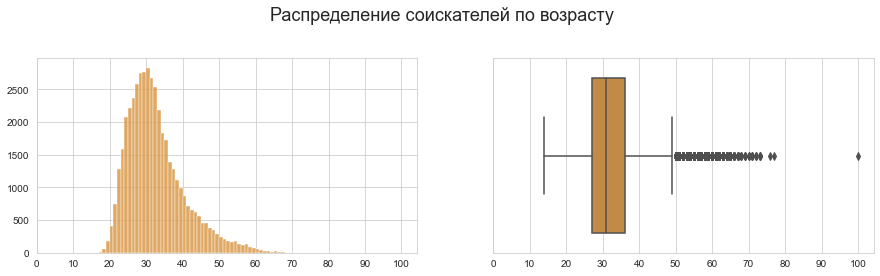

In [84]:
sns.set_style("whitegrid")
colors = sns.color_palette('husl', 9)[1:]

def figax(name, figsize=(7, 4), rowcol=None):
    fig = plt.figure(name, figsize=figsize)
    
    if rowcol is None:
        ax = fig.add_axes([0,0,1,1])
    else:
        rows, cols = rowcol
        ax = fig.subplots(rows, cols)

    return fig, ax

fig, ax = figax('age', figsize=(15, 4), rowcol=(1, 2))

sns.histplot(ax=ax[0], data=hh['Возраст'], binwidth=1, color=colors[0])
sns.boxplot(ax=ax[1], data=hh['Возраст'], orient='h', color=colors[0])

fig.subplots_adjust(top=0.8)
fig.suptitle('Распределение соискателей по возрасту', fontsize=18)

ax[0].set_xlabel('')
ax[0].set_xticks(range(0, 101, 10))
ax[0].set_ylabel('')
ax[1].set_yticks([])
ax[1].set_xticks(range(0, 101, 10));



---

## Вывод

Графики говорят следующее:
- больше всего соискателей в возрасте 31 год
- самым юным соискателям 17 лет, самым пожилым 77
- основная часть это люди от 24 до 36 лет
- есть как минимум один человек, указавший возраст 100 лет, что является аномалией

---

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [ ]:
# ваш код здесь

ваши выводы здесь

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [ ]:
# ваш код здесь

ваши выводы здесь

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [ ]:
# ваш код здесь

ваши выводы здесь

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [ ]:
# ваш код здесь

ваши выводы здесь

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [ ]:
# ваш код здесь

In [ ]:
# ваши выводы здесь

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [ ]:
# ваш код здесь

ваши выводы здесь

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [ ]:
# ваш код здесь

ваши выводы здесь

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [ ]:
# ваш код здесь

ваши выводы здесь

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [ ]:
# ваш код здесь

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [ ]:
# ваш код здесь

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [ ]:
# ваш код здесь

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [ ]:
# ваш код здесь

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [12]:
# ваш код здесь

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**? В какую сторону **асимметрично логарифмическое распределение**? Найдите выбросы с помощью **метода z-отклонения** и удалите их из данных, используйте логарифмический масштаб, сделайте **послабление на 1 сигму (возьмите 4 сигмы)** в сторону, противоположную асимметрии. 

In [ ]:
# ваш код здесь